I'm going to predict the closing stock prices of IBM in 2022 based on all its historical data from 2001-2021.

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('IBM.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2001-07-23,101.051628,102.246651,100.669212,101.195030,60.314636,6606222
1,2001-07-24,100.239006,101.481834,99.225624,99.913956,59.551090,7635591
2,2001-07-25,99.904396,101.051628,98.212234,100.277245,59.767632,6534990
3,2001-07-26,100.143402,101.338432,98.403442,101.338432,60.400089,8816420
4,2001-07-27,100.143402,101.290634,99.531548,100.095604,59.659351,4546439


In [3]:
df.shape

(5282, 7)

In [4]:
df.set_index('Date',inplace=True)

In [5]:
training_set = df.loc['2001-01-01':'2021-12-31']['Close'].to_numpy()
test_set = df.loc['2022-01-01':'2022-07-20']['Close'].to_numpy()

In [6]:
scaler = StandardScaler()
training_set = scaler.fit_transform(training_set.reshape(-1,1))

In [7]:
X_train = []
y_train = []

for i in range(120,5145):
    X_train.append(training_set[i-120:i,0])
    y_train.append(training_set[i,0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [8]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) # no. of stock prices, no. of timeseries steps, no. of predictors

In [9]:
regressor = Sequential()

In [10]:
regressor.add(LSTM(units=100,return_sequences=True,input_shape=(X_train.shape[1],1)))

In [11]:
regressor.add(Dropout(0.2))

In [12]:
regressor.add(LSTM(units=100,return_sequences=True))
regressor.add(Dropout(0.2))

In [13]:
regressor.add(LSTM(units=100,return_sequences=True))
regressor.add(Dropout(0.3))

In [14]:
regressor.add(LSTM(units=100,return_sequences=True))
regressor.add(Dropout(0.2))

In [15]:
regressor.add(LSTM(units=100))
regressor.add(Dropout(0.2))

In [16]:
regressor.add(Dense(units=1))

In [17]:
regressor.compile(loss='mean_squared_error',optimizer='adam')

In [18]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 120, 100)          40800     
                                                                 
 dropout (Dropout)           (None, 120, 100)          0         
                                                                 
 lstm_1 (LSTM)               (None, 120, 100)          80400     
                                                                 
 dropout_1 (Dropout)         (None, 120, 100)          0         
                                                                 
 lstm_2 (LSTM)               (None, 120, 100)          80400     
                                                                 
 dropout_2 (Dropout)         (None, 120, 100)          0         
                                                                 
 lstm_3 (LSTM)               (None, 120, 100)          8

In [19]:
regressor.fit(X_train,y_train,batch_size=32,epochs=20)

Epoch 1/20
158/158 [==============================] - 100s 569ms/step - loss: 0.0624
Epoch 2/20
158/158 [==============================] - 85s 535ms/step - loss: 0.0293
Epoch 3/20
158/158 [==============================] - 86s 544ms/step - loss: 0.0228
Epoch 4/20
158/158 [==============================] - 90s 567ms/step - loss: 0.0197
Epoch 5/20
158/158 [==============================] - 113s 715ms/step - loss: 0.0226
Epoch 6/20
158/158 [==============================] - 100s 629ms/step - loss: 0.0171
Epoch 7/20
158/158 [==============================] - 86s 542ms/step - loss: 0.0148
Epoch 8/20
158/158 [==============================] - 87s 548ms/step - loss: 0.0158
Epoch 9/20
158/158 [==============================] - 79s 498ms/step - loss: 0.0162
Epoch 10/20
158/158 [==============================] - 79s 500ms/step - loss: 0.0139
Epoch 11/20
158/158 [==============================] - 80s 503ms/step - loss: 0.0120
Epoch 12/20
158/158 [==============================] - 80s 504ms/step -

In [20]:
inputs = df[len(df)-len(test_set)-120:]['Close'].to_numpy()
inputs_scaled = scaler.transform(inputs.reshape(-1,1))

In [21]:
len(inputs_scaled)

257

In [22]:
X_test = []

for i in range(120,257):
    X_test.append(inputs_scaled[i-120:i,0])

X_test = np.array(X_test)

In [23]:
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [24]:
predicted_stock_prices = regressor.predict(X_test)

5/5 [==============================] - 2s 75ms/step


In [28]:
real_stock_prices = scaler.transform(test_set.reshape(-1,1))

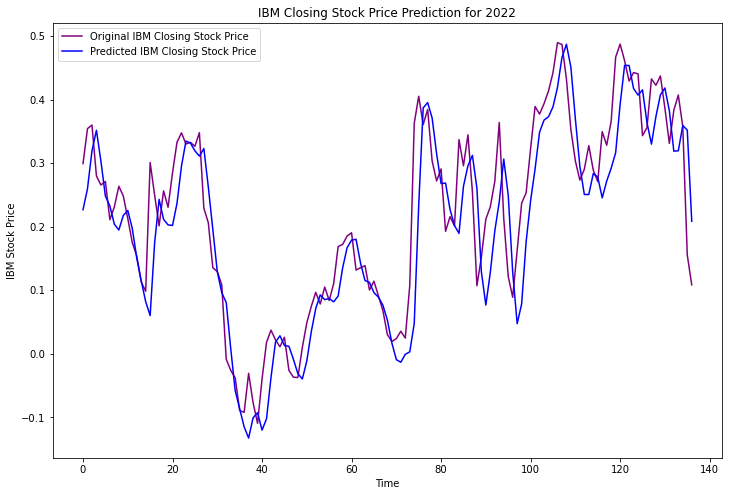

In [29]:
plt.figure(figsize=(12,8))
plt.plot(real_stock_prices,color='purple',label='Original IBM Closing Stock Price')
plt.plot(predicted_stock_prices,color='blue',label='Predicted IBM Closing Stock Price')
plt.title('IBM Closing Stock Price Prediction for 2022')
plt.xlabel('Time')
plt.ylabel('IBM Stock Price')
plt.legend();

In [31]:
print("RMSE:",np.sqrt(mean_squared_error(real_stock_prices,predicted_stock_prices)))
print("R2 Score:",r2_score(real_stock_prices,predicted_stock_prices))

RMSE: 0.07292974752952311
R2 Score: 0.7648477744015836
